In [63]:
import pandas as pd
import requests as req
import pytz
import time
import matplotlib.pyplot as plt
import numpy as np
import os

from datetime import datetime


coin_market_cap_df = pd.DataFrame(columns=["name", "symbol", "price_usd", "market_cap_usd",
                                           "total_supply", "last_updated"])
coin_market_cap_df.set_index("symbol")

url = "https://api.coinmarketcap.com/v1/ticker"
res = req.get(url).json()
for each in res:
    coin_market_cap_df.set_value(each["symbol"], "symbol", each["symbol"])    
    coin_market_cap_df.set_value(each["symbol"], "name", each["name"])    
    coin_market_cap_df.set_value(each["symbol"], "price_usd", each["price_usd"])    
    coin_market_cap_df.set_value(each["symbol"], "market_cap_usd", each["market_cap_usd"])    
    coin_market_cap_df.set_value(each["symbol"], "total_supply", each["total_supply"])
    
    if each["last_updated"] is None:
        pass
    else:
        last_updated = datetime.utcfromtimestamp(float(each["last_updated"]))
        coin_market_cap_df.set_value(each["symbol"], "last_updated", last_updated.strftime("%Y-%m-%d"))    

coin_market_cap_df["market_cap_usd"] = coin_market_cap_df["market_cap_usd"].astype(float)
coin_market_cap_df = coin_market_cap_df.sort_values("market_cap_usd", ascending=False) 
coin_market_cap_df.head(10)


,name,symbol,price_usd,market_cap_usd,total_supply,last_updated
BTC,Bitcoin,BTC,7680.44,1.294196e+11,16850550.0,2018-02-07
ETH,Ethereum,ETH,779.173,7.593638e+10,97457663.0,2018-02-07
XRP,Ripple,XRP,0.765943,2.987884e+10,99992725510.0,2018-02-07
BCH,Bitcoin Cash,BCH,960.02,1.627564e+10,16953438.0,2018-02-07
ADA,Cardano,ADA,0.362466,9.397682e+09,31112483745.0,2018-02-07
LTC,Litecoin,LTC,141.007,7.770033e+09,55103883.0,2018-02-07
NEO,NEO,NEO,105.142,6.834230e+09,100000000.0,2018-02-07
XLM,Stellar,XLM,0.364535,6.719135e+09,103669352049,2018-02-07
EOS,EOS,EOS,8.34622,5.450880e+09,900000000.0,2018-02-07
XEM,NEM,XEM,0.592423,5.331807e+09,8999999999.0,2018-02-07


In [64]:
topten_df = coin_market_cap_df.head(10)
topten_df

,name,symbol,price_usd,market_cap_usd,total_supply,last_updated
BTC,Bitcoin,BTC,7680.44,1.294196e+11,16850550.0,2018-02-07
ETH,Ethereum,ETH,779.173,7.593638e+10,97457663.0,2018-02-07
XRP,Ripple,XRP,0.765943,2.987884e+10,99992725510.0,2018-02-07
BCH,Bitcoin Cash,BCH,960.02,1.627564e+10,16953438.0,2018-02-07
ADA,Cardano,ADA,0.362466,9.397682e+09,31112483745.0,2018-02-07
LTC,Litecoin,LTC,141.007,7.770033e+09,55103883.0,2018-02-07
NEO,NEO,NEO,105.142,6.834230e+09,100000000.0,2018-02-07
XLM,Stellar,XLM,0.364535,6.719135e+09,103669352049,2018-02-07
EOS,EOS,EOS,8.34622,5.450880e+09,900000000.0,2018-02-07
XEM,NEM,XEM,0.592423,5.331807e+09,8999999999.0,2018-02-07


In [65]:
#topten_df.set_value("OTHER", "symbol", "Other")
#topten_df.set_value("OTHER", "market_cap_usd", 1000000)
row = {"name": "Other", "symbol": "OTHER", "market_cap_usd": 57722671814.0}
topten_df = topten_df.append(row,ignore_index=True)
topten_df

,name,symbol,price_usd,market_cap_usd,total_supply,last_updated
0,Bitcoin,BTC,7680.44,1.294196e+11,16850550.0,2018-02-07
1,Ethereum,ETH,779.173,7.593638e+10,97457663.0,2018-02-07
2,Ripple,XRP,0.765943,2.987884e+10,99992725510.0,2018-02-07
3,Bitcoin Cash,BCH,960.02,1.627564e+10,16953438.0,2018-02-07
4,Cardano,ADA,0.362466,9.397682e+09,31112483745.0,2018-02-07
5,Litecoin,LTC,141.007,7.770033e+09,55103883.0,2018-02-07
6,NEO,NEO,105.142,6.834230e+09,100000000.0,2018-02-07
7,Stellar,XLM,0.364535,6.719135e+09,103669352049,2018-02-07
8,EOS,EOS,8.34622,5.450880e+09,900000000.0,2018-02-07
9,NEM,XEM,0.592423,5.331807e+09,8999999999.0,2018-02-07


In [66]:
totalcap = coin_market_cap_df["market_cap_usd"].sum()
totalcap

351462626478.0

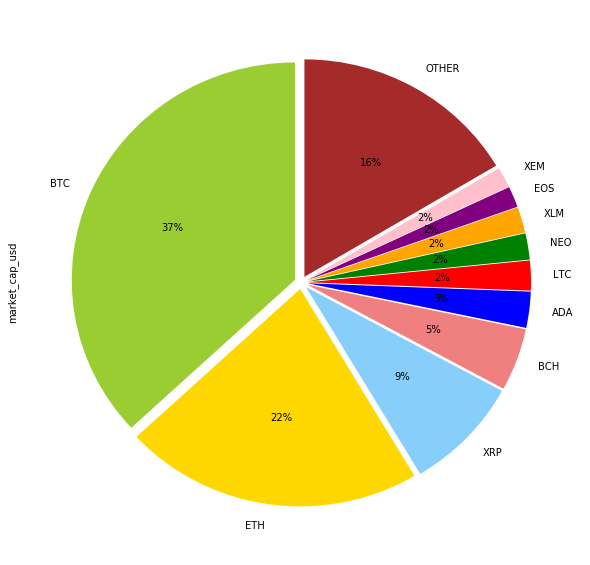

In [67]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'red', 'green', 'orange', 'purple', 'pink', 'brown']
explode=(0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
labels = topten_df["symbol"]
pie_chart = topten_df.market_cap_usd.plot(kind='pie', colors = colors, labels = labels, startangle=90, 
                                          figsize=(10,10), explode=explode, autopct='%1.f%%')
plt.show()


In [68]:
captopten = topten_df["market_cap_usd"].sum()
captopten
    

350736930757.0

In [69]:
othercap = totalcap - captopten
othercap

725695721.0